# Preliminary to Breaking down into Research Questions

Since we have many models, checkpoints and saliency maps, it was important to have an easy access to those things.
We have `RQ.weight_parser.py` module to achieve our needs and here are the basic usage.

In default, all weights are saved in `meta_brain/weights/default` directory.
Other than `default` directoy contains ablation studies/checkpoints of some models and they may not contain target saliency methods or checkpoints in need.

### Naming Protocols
They're naively named after model name, e.g. resnet10.
Since we also deals with seed variability, we have a suffix that represents seed number, i.e. resnet10-seed42

### Attributes

- Meta Information
  - `prediction`: Inference results on test dataset
  - `config`: Hydra config yaml file used to batch the experiment
  - `ckpt_dict`: Dictionary of checkpoints with parsed information on step-performance.
  - `test_performance`: Test inference performance on 3,029 brains. `__repr__` will hold this value in string as well.

- XAI Information
  - `xai_dict`: Projected RoI Saliency key-value dict, averaged across 3,029 brains
  - `xai_dict_indiv`: Projected RoI Saliency key-list, where each list contains 3,029 individuals saliency maps.
  - `img_dict`: All image files PosixPath. Images include visualization of saliency map via nilearn.
  - `attrs`: `np.ndarray` of total averaged saliency maps without top-k value extracted.
  - `top_attr`: `np.ndarray` of averaged across top-k saliency maps.

Note that each XAI information can be set after `load_xai` method. This is to ensure that _which_ XAI method information is being extracted, since there are multiple methods of XAI.

## Fetching Base Information

In [1]:
# Basic Usage
from weight_parser import Weights

resnet10_42 = Weights(model_name="resnet10", seed=42)

INFO:/home/daehyun/codespace/brain-age-prediction/RQ/weight_parser.py:Set base_path as /home/daehyun/codespace/brain-age-prediction/meta_brain/weights/default/resnet10-42
INFO:/home/daehyun/codespace/brain-age-prediction/RQ/weight_parser.py:Loading Basic Information


In [2]:
resnet10_42.prediction

{'loss': metatensor([ 6.8574,  6.6092,  4.0870,  4.2467, 14.9120,  9.6608,  7.5648,  6.5287,
          7.5628,  9.1117,  7.2554,  7.1737, 10.8974,  9.3474,  9.5231,  7.7420,
          7.3360,  5.3722, 12.4250,  9.9102,  7.6106, 13.4158, 13.7678, 10.4643,
          5.9760, 11.8100,  8.3364, 14.3582, 11.9143, 10.4633, 10.2717,  9.8976,
          9.8213, 10.8430, 12.5011,  6.5727,  8.2385,  6.8624, 14.0359,  8.7301,
         12.5269,  5.3029, 10.8694, 10.3541, 10.7945,  8.0213, 11.8855, 15.6165,
          6.9720,  8.1804, 12.5467, 12.2646, 12.7532, 10.0480,  6.1709, 10.3209,
         13.4379,  9.7357, 10.6232, 10.8740,  9.2203,  7.6944,  6.9129, 11.4115,
          7.1686,  8.2259,  6.7797,  9.7257, 15.3016, 10.7471,  9.3316,  8.4056,
          9.4702, 11.3525,  6.9490, 15.1385,  7.5234, 10.5188,  7.6345,  8.8465,
          9.4362, 14.9369,  9.7391, 13.2086, 11.8094, 11.9764,  9.7353, 11.3397,
         10.2826,  6.4984, 11.6619,  8.9934,  9.5255, 14.0168, 15.5532]),
 'pred': metatensor([67

In [3]:
resnet10_42.config

{'dataloader': {'_target_': 'torch.utils.data.DataLoader', 'batch_size': 32, 'num_workers': 4, 'pin_memory': True, 'dataset': '${dataset}'}, 'misc': {'seed': 42, 'debug': False, 'modes': ['train', 'valid', 'test']}, 'module': {'_target_': 'sage.trainer.PLModule', '_recursive_': False, 'augmentation': {'_target_': 'sage.data.augment', 'spatial_size': [160, 192, 160]}, 'load_from_checkpoint': None, 'load_model_ckpt': None, 'separate_lr': None, 'save_dir': '${callbacks.checkpoint.dirpath}'}, 'metrics': {'mae': {'_target_': 'torchmetrics.MeanAbsoluteError'}, 'rmse': {'_target_': 'torchmetrics.MeanSquaredError', 'squared': False}, 'r2': {'_target_': 'torchmetrics.R2Score'}}, 'logger': {'_target_': 'pytorch_lightning.loggers.WandbLogger', 'project': 'brain-age', 'entity': '1pha', 'name': 'R ${model.name} | ${module.augmentation.spatial_size} | ${misc.seed}', 'tags': ['model=${model.name}', 'REG']}, 'trainer': {'_target_': 'pytorch_lightning.Trainer', 'max_epochs': 500, 'devices': 1, 'acceler

In [4]:
resnet10_42.ckpt_dict

{'steps': [(50000, 6.292),
  (250, 3736.735),
  (1000, 537.31),
  (25000, 9.847),
  (100000, 7.116),
  (10000, 17.014)],
 'last': PosixPath('/home/daehyun/codespace/brain-age-prediction/meta_brain/weights/default/resnet10-42/last.ckpt'),
 'best': PosixPath('/home/daehyun/codespace/brain-age-prediction/meta_brain/weights/default/resnet10-42/156864-valid_mae3.465.ckpt'),
 'best_valid_mae': [(156864, 3.465)]}

In [5]:
resnet10_42.test_performance

{'mse': 9.836, 'mae': 2.472, 'r2': 0.8315}

## Fetching Informations of Explainability methods 



In [6]:
resnet10_42.load_xai(xai_method="gbp")

INFO:/home/daehyun/codespace/brain-age-prediction/RQ/weight_parser.py:Loading XAI information from /home/daehyun/codespace/brain-age-prediction/meta_brain/weights/default/resnet10-42/gbpk0.99


In [7]:
resnet10_42.xai_dict

{'Left-Cerebral-White-Matter': 0.15630731406495435,
 'Left-Lateral-Ventricle': 0.6957168006506934,
 'Left-Inf-Lat-Vent': 0.10404497136550818,
 'Left-Cerebellum-White-Matter': 1.5143362531476072,
 'Left-Cerebellum-Cortex': 0.5381404644688782,
 'Left-Thalamus': 1.2142168953930585,
 'Left-Caudate': 0.6862779158485125,
 'Left-Putamen': 1.4636496779375936,
 'Left-Pallidum': 2.0797911295214724,
 '3rd-Ventricle': 2.5183922453495002,
 '4th-Ventricle': 0.5923415455801275,
 'Brain-Stem': 0.9234419224351268,
 'Left-Hippocampus': 0.16901173787404838,
 'Left-Amygdala': 0.30976443748508337,
 'CSF': 0.43540367069232594,
 'Left-Accumbens-area': 0.5724081656030201,
 'Left-VentralDC': 1.2987201759432883,
 'Left-choroid-plexus': 0.4518537586756545,
 'Right-Cerebral-White-Matter': 0.09066763225086949,
 'Right-Lateral-Ventricle': 0.5764432871728291,
 'Right-Inf-Lat-Vent': 0.036970381215333005,
 'Right-Cerebellum-White-Matter': 1.4926739162785665,
 'Right-Cerebellum-Cortex': 0.12309100013790775,
 'Right-Tha

In [8]:
resnet10_42.xai_dict_indiv

,Left-Cerebral-White-Matter,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,...,ctx-rh-precentral,ctx-rh-precuneus,ctx-rh-rostralanteriorcingulate,ctx-rh-rostralmiddlefrontal,ctx-rh-superiorfrontal,ctx-rh-superiorparietal,ctx-rh-superiortemporal,ctx-rh-supramarginal,ctx-rh-transversetemporal,ctx-rh-insula
0,0.301462,0.689774,0.190154,2.149760,0.868676,0.826454,0.382270,2.269142,2.800545,2.858510,...,0.080841,0.069588,1.130122,0.054220,0.111043,-0.018646,0.130238,0.044405,0.408303,0.092535
1,0.256210,0.608032,0.301540,2.310052,1.184941,0.424203,0.067182,1.632700,2.245873,2.114655,...,0.153520,0.173626,0.591794,0.076563,0.189150,-0.000281,0.181059,0.011440,0.041966,0.079187
2,0.287304,0.710958,0.256757,1.732858,0.880577,0.871143,0.200551,2.025243,2.486542,3.082408,...,0.140928,0.130216,0.946879,0.040368,0.150622,-0.005639,0.113072,-0.023035,0.262829,0.108008
3,0.170034,0.500886,0.171725,0.985182,0.411025,0.500793,0.089483,1.224457,1.533953,2.223675,...,0.059896,0.051386,0.593229,-0.001719,0.048090,-0.023169,0.074163,0.001303,0.211104,0.070233
4,-0.002144,-0.014891,-0.018142,-0.019924,-0.017627,-0.018191,-0.021655,0.016176,0.004088,-0.017956,...,-0.013877,-0.021137,-0.021007,-0.015928,-0.021028,-0.010820,-0.015274,-0.009742,-0.021270,-0.021601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3024,0.290157,0.824586,0.233702,2.048092,0.937886,0.735394,0.382217,2.062795,3.210752,2.023072,...,0.140695,0.132238,1.023067,0.066546,0.159595,-0.008582,0.213459,0.043593,0.668012,0.133496
3025,0.261340,0.692807,0.185934,2.507879,1.110467,0.664294,0.122061,1.965632,2.140579,2.780425,...,0.150634,0.123257,0.636727,0.066106,0.185529,0.005841,0.096608,0.004117,0.249722,0.068921
3026,0.323924,0.859687,0.135726,1.786716,0.767392,0.983733,0.158252,2.145676,2.715471,3.249505,...,0.117110,0.122875,1.063719,0.022538,0.180262,-0.033903,0.153943,0.023085,0.368045,0.120124
3027,0.001323,0.004386,0.009032,0.017795,0.003769,0.008973,-0.017078,0.142221,0.117088,0.031065,...,-0.007157,-0.012819,-0.006261,-0.010669,-0.012524,-0.007282,-0.008738,-0.005950,-0.007056,-0.016234


In [9]:
resnet10_42.attrs

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

## Performance Table

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

import constants as C
from weight_parser import WeightAvg

In [11]:
avg_dict = dict()
performance_table = dict()
for model in C.MODELS:
    avg = WeightAvg(model_name=model, xai_method="", seeds=[42, 43, 44])
    avg_dict[model] = avg
    performance_table[model] = avg.test_performance

INFO:/home/daehyun/codespace/brain-age-prediction/RQ/weight_parser.py:Load all seeds: [42, 43, 44]


Text(0.5, 0, 'Model Architecture')

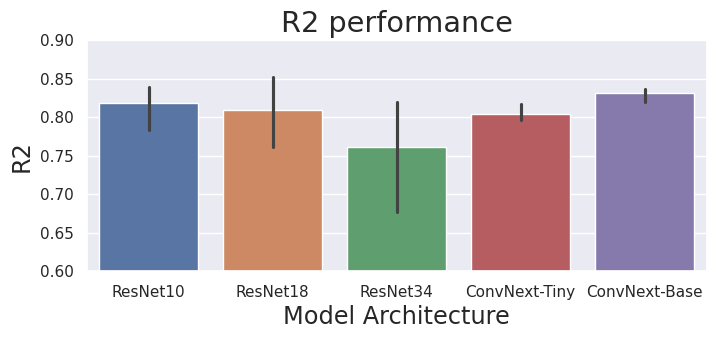

In [16]:
metric = "r2"

pdf = dict()
for model in avg_dict:
    _avg = avg_dict[model]
    key = C.MODEL_KEY.get(model)
    pdf[key] = [_avg.seed_dict[seed].test_performance[metric] for seed in _avg.seed_dict]
pdf = pd.DataFrame(pdf)


fig, ax = plt.subplots(figsize=(8, 3))
sns.barplot(pdf, ax=ax)
ax.set_title(f"{metric.upper()} performance", size="xx-large")

ls = "x-large"
ax.set_ylabel(metric.upper(), size=ls)
if metric == "mae":
    ax.set_ylim(2, 3.8)
elif metric == "r2":
    ax.set_ylim(0.6, 0.9)
ax.set_xlabel("Model Architecture", size=ls)